In [2]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)




In [4]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
# Groupby "Film" and "Category" to get count of 
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index()
# .rename(columns={"index":"Title", "film":"Nomination"})
df2

,film,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1
...,...,...,...
9971,the end,SHORT FILM (Animated),1
9972,tom thumb,SPECIAL EFFECTS,1
9973,À Nous la Liberté,ART DIRECTION,1
9974,Ådalen '31,FOREIGN LANGUAGE FILM,1


In [6]:
# Count of nominations for titles across all award categories

df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Moulin Rouge,15
3,Mutiny on the Bounty,15
4,La La Land,14
...,...,...
4828,Paddle to the Sea,1
4829,Superman Returns,1
4830,We Can't Live without Cosmos,1
4831,Dragonheart,1


In [7]:
# Count of wins for titles across all award categories

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4.head()

,Title,Wins
0,Titanic,12
1,The Lord of the Rings: The Return of the King,11
2,Ben-Hur,11
3,West Side Story,10
4,Gigi,9


In [8]:
# Dataframe of all Academy Award nominations and wins
wins_nominations_df = pd.merge(df2, df4, on="Title", how="left")
wins_nominations_df = wins_nominations_df.fillna(0)
wins_nominations_df

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Moulin Rouge,15,4.0
3,Mutiny on the Bounty,15,1.0
4,La La Land,14,6.0
...,...,...,...
4828,Paddle to the Sea,1,0.0
4829,Superman Returns,1,0.0
4830,We Can't Live without Cosmos,1,0.0
4831,Dragonheart,1,0.0


In [9]:
#Clean up movies_df by dropping unnamed column and resetting index

movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [10]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [11]:
# Merge on left dataframe to keep all streaming movies

# First merge cleaned movies dataframe with count of all award wins and nominations
movies_clean_df2 = pd.merge(movies_clean_df, wins_nominations_df, on="Title", how="left")

# Second merge above dataframe with Best Picture win ("True, False, NaN")
combined_df = pd.merge(movies_clean_df2, oscars_clean_df, how="left")
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN


In [12]:
# Slice new combined_df to count of Netflix movies that were nominated for Best Picture
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               32
Year                32
Age                 32
IMDb                32
Rotten Tomatoes     32
Netflix             32
Hulu                32
Prime Video         32
Disney+             32
Type                32
Directors           31
Genres              32
Country             32
Language            32
Runtime             32
Nomination          32
Wins                32
Won Best Picture    32
dtype: int64

In [13]:
# "Won Best Picture" values are currently: 
# True = Won
# False = Nominated
# NaN = Not Nominated

combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [14]:
# Change "Won Best Picture" values to: 
# 2 = Won
# 1 = Nominated
# 0 = Not Nominated

combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [15]:
combined_df.head()

# Fill NaN in Nomination, Runtime, and Wins with 0
combined_df["Nomination"] = combined_df["Nomination"].fillna(0)
combined_df["Runtime"] = combined_df["Runtime"].fillna(0)
combined_df["Wins"] = combined_df["Wins"].fillna(0)
combined_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0.0,0.0,0.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0.0,0.0,0.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0,0.0,0.0,0.0
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0,0.0,0.0,0.0


In [16]:
# Sort Academy Award nominated movies by highest IMDb rating ("Won Best Picture": 1=Nominated, 2=Won)
imdb_df = combined_df[combined_df["Won Best Picture"]==1].sort_values("IMDb", ascending=False).head(10)

# IMDb highest ratings, broken down by service
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Hulu"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Prime Video"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Disney+"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

imdb_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
3564,The Green Mile,1999,18+,8.6,78%,0,1,0,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0,4.0,0.0,1.0
4439,It's a Wonderful Life,1946,7+,8.6,94%,0,0,1,0,0,Frank Capra,"Drama,Family,Fantasy",United States,"English,French",130.0,5.0,0.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,5.0,2.0,1.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,9.0,5.0,1.0
16222,Toy Story 3,2010,all,8.3,98%,0,0,0,1,0,Lee Unkrich,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Spanish",103.0,5.0,2.0,1.0
10,Taxi Driver,1976,18+,8.3,95%,1,0,0,0,0,Martin Scorsese,"Crime,Drama",United States,"English,Spanish",114.0,4.0,0.0,1.0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,8.0,1.0,1.0
3563,Good Will Hunting,1997,18+,8.3,97%,0,1,0,0,0,Gus Van Sant,"Drama,Romance",United States,English,126.0,9.0,2.0,1.0


In [17]:
# Fill NaN values with Unknown
combined_df2 = combined_df.fillna("Unknown")


In [18]:
combined_df2

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,Unknown,6.2,Unknown,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0.0,0.0,0.0
16740,The Poof Point,2001,7+,4.7,Unknown,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0.0,0.0,0.0
16741,Sharks of Lost Island,2013,Unknown,5.7,Unknown,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0,0.0,0.0,0.0
16742,Man Among Cheetahs,2017,Unknown,6.6,Unknown,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0,0.0,0.0,0.0


What are the top genres for each streaming service?
This is an important question to answer because genre is one of the top factors in deciding what to watch.

In [19]:
#TOTAL: Count of number or movies per genre
genre_count = {}
for Genres in combined_df2["Genres"].values:

    genres_list = Genres.split(",")
    
    for genre in genres_list:
        genre = genre.strip()
        if genre not in genre_count:
            genre_count[genre]=0
        genre_count[genre] +=1
    
#genre_count

genre_name = genre_count.keys() 
count_genre = genre_count.values() 
# print("Genres : ", str(genre_name)) 
# print("Count : ", str(count_genre))


allgenres_df=pd.DataFrame(count_genre, index=genre_name)
allgenres_df.head(5)

,0
Action,2683
Adventure,1778
Sci-Fi,1228
Thriller,3354
Comedy,4637


In [20]:
#NETFLIX: Count of number or movies per genre

netflix_genre_data= combined_df2[["Title", "Netflix", "Genres", "Wins"]].drop_duplicates()
netflix_genre_data2=netflix_genre_data.loc[netflix_genre_data["Netflix"]==1]
netflix_genre_data2.head()

,Title,Netflix,Genres,Wins
0,Inception,1,"Action,Adventure,Sci-Fi,Thriller",4.0
1,The Matrix,1,"Action,Sci-Fi",4.0
2,Avengers: Infinity War,1,"Action,Adventure,Sci-Fi",0.0
3,Back to the Future,1,"Adventure,Comedy,Sci-Fi",1.0
4,"The Good, the Bad and the Ugly",1,Western,0.0


In [21]:
net_genre_count = {}

for Genres in netflix_genre_data2["Genres"].values:

    net_genres_list = Genres.split(",")
    
    for genre in net_genres_list:
        genre = genre.strip()
        if genre not in net_genre_count:
            net_genre_count[genre]=0
        net_genre_count[genre] +=1
    
# net_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
net_genre_name = net_genre_count.keys() 
net_genre_count = net_genre_count.values() 

#Creating DataFrame for the top 10 genres
netflix_genre_df=pd.DataFrame(net_genre_count, index=net_genre_name)
netflix_genre_df= netflix_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_netflix_genres= netflix_genre_df[0:10]
top_netflix_genres

#Adding Percentages

netflix_total= top_netflix_genres["Genre Count"].sum()
netflix_percentages= ((top_netflix_genres["Genre Count"]/netflix_total).apply('{:.0%}'.format))
idx=2
top_netflix_genres.insert(loc=idx,column="Percentage", value=netflix_percentages)

print("There are a total of", netflix_total, "movies.")
top_netflix_genres

There are a total of 6339 movies.


,Genre,Genre Count,Percentage
0,Drama,1501,24%
1,Comedy,1308,21%
2,Thriller,652,10%
3,Romance,551,9%
4,Action,545,9%
5,Documentary,511,8%
6,Crime,372,6%
7,Adventure,318,5%
8,Family,315,5%
9,Horror,266,4%


The top genres that take up 45% of Netflix's total movies are Drama and Comedy. Netflix and Hulu have the same top 10 genres, but their rankings differ. Despite of their identical top 10 genres, Netflix offers about 3.5 times more movies than Hulu. Additionally, Netflix, Hulu and Prime Video all share the same top 3 genres: Drama, Comedy, and Thriller.

<AxesSubplot:xlabel='Genre'>

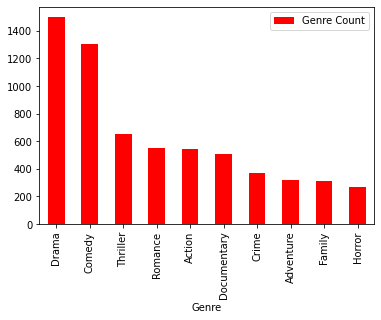

In [22]:
#NETFLIX GENRES: Bar Graph

top_netflix_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='r')

In [23]:
#HULU: Count of number or movies per genre

hulu_genre_data= combined_df2[["Title", "Hulu", "Genres", "Wins"]].drop_duplicates()
hulu_genre_data2=hulu_genre_data.loc[hulu_genre_data["Hulu"]==1]
hulu_genre_data2.head()

,Title,Hulu,Genres,Wins
67,Blackfish,1,"Documentary,News",0.0
97,Jiro Dreams of Sushi,1,Documentary,0.0
146,The Patriot,1,"Action,Drama,History,War",1.0
148,The Square,1,"Comedy,Drama",0.0
214,Hitch,1,"Comedy,Romance",0.0


In [24]:
hulu_genre_count = {}

for Genres in hulu_genre_data2["Genres"].values:

    hulu_genres_list = Genres.split(",")
    
    for genre in hulu_genres_list:
        genre = genre.strip()
        if genre not in hulu_genre_count:
            hulu_genre_count[genre]=0
        hulu_genre_count[genre] +=1
    
# hulu_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
hulu_genre_name = hulu_genre_count.keys() 
hulu_genre_count = hulu_genre_count.values() 

#Creating DataFrame for the top 10 genres
hulu_genre_df=pd.DataFrame(hulu_genre_count, index=hulu_genre_name)
hulu_genre_df= hulu_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_hulu_genres= hulu_genre_df[0:10]
top_hulu_genres

#Adding Percentages

hulu_total= top_hulu_genres["Genre Count"].sum()
hulu_percentages= ((top_hulu_genres["Genre Count"]/hulu_total).apply('{:.0%}'.format))
idx=2
top_hulu_genres.insert(loc=idx,column="Percentage", value=hulu_percentages)

print("There are a total of", hulu_total, "movies.")
top_hulu_genres


There are a total of 1783 movies.


,Genre,Genre Count,Percentage
0,Drama,438,25%
1,Comedy,272,15%
2,Thriller,221,12%
3,Romance,151,8%
4,Documentary,132,7%
5,Action,129,7%
6,Horror,124,7%
7,Adventure,111,6%
8,Family,105,6%
9,Crime,100,6%


The top genres that make up 52% of Hulu's movies are Drama, Comedy and Thriller. Compared to the other 3 streaming services, they offer the 2nd least amount of movies. 

<AxesSubplot:xlabel='Genre'>

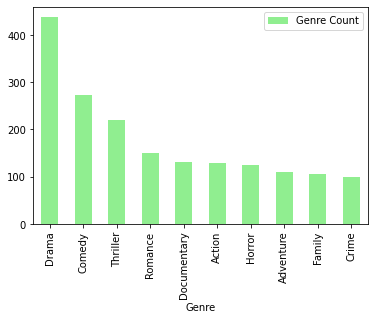

In [25]:
#HULU GENRES: Bar Graph
top_hulu_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='lightgreen')

In [26]:
#Prime Video: Count of number or movies per genre

prime_genre_data= combined_df2[["Title", "Prime Video", "Genres", "Wins"]].drop_duplicates()
prime_genre_data2=prime_genre_data.loc[prime_genre_data["Prime Video"]==1]
prime_genre_data2.head()

,Title,Prime Video,Genres,Wins
4,"The Good, the Bad and the Ugly",1,Western,0.0
6,The Pianist,1,"Biography,Drama,Music,War",3.0
11,3 Idiots,1,"Comedy,Drama",0.0
15,Once Upon a Time in the West,1,Western,0.0
31,Drive,1,"Crime,Drama",0.0


In [27]:
prime_genre_count = {}

for Genres in prime_genre_data2["Genres"].values:

    prime_genres_list = Genres.split(",")
    
    for genre in prime_genres_list:
        genre = genre.strip()
        if genre not in prime_genre_count:
            prime_genre_count[genre]=0
        prime_genre_count[genre] +=1
    
# prime_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
prime_genre_name = prime_genre_count.keys() 
prime_genre_count = prime_genre_count.values() 

#Creating DataFrame for the top 10 genres
prime_genre_df=pd.DataFrame(prime_genre_count, index=prime_genre_name)
prime_genre_df= prime_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_prime_genres= prime_genre_df[0:10]

#Adding Percentages

prime_total= top_prime_genres["Genre Count"].sum()
prime_percentages= ((top_prime_genres["Genre Count"]/prime_total).apply('{:.0%}'.format))
idx=2
top_prime_genres.insert(loc=idx,column="Percentage", value=prime_percentages)
print("There are a total of", prime_total, "movies.")
top_prime_genres


There are a total of 22158 movies.


,Genre,Genre Count,Percentage
0,Drama,5437,25%
1,Comedy,3004,14%
2,Thriller,2632,12%
3,Action,2049,9%
4,Documentary,1895,9%
5,Horror,1878,8%
6,Romance,1691,8%
7,Crime,1423,6%
8,Adventure,1166,5%
9,Mystery,983,4%


Prime Video's top 3 genres: Drama, Comedy and Thriller, make up 71% of their total movies. What seperates Prime Video from the other 3 is that they are the only one with the Mystery genre within their top 10. They are also the streaming service with the highest number of movies, ideal for someone looking for a wide array of titles to choose from. 

<AxesSubplot:xlabel='Genre'>

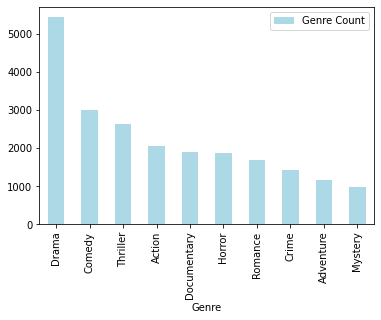

In [28]:
#PRIME VIDEO GENRES: Bar Graph
top_prime_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='lightblue')

In [29]:
#Prime Video: Count of number or movies per genre

disney_genre_data= combined_df2[["Title", "Disney+", "Genres", "Wins"]].drop_duplicates()
disney_genre_data2=disney_genre_data.loc[disney_genre_data["Disney+"]==1]
disney_genre_data2.head()

,Title,Disney+,Genres,Wins
95,Saving Mr. Banks,1,"Biography,Comedy,Drama",0.0
103,Amy,1,Drama,1.0
122,Bolt,1,"Animation,Adventure,Comedy,Drama,Family",0.0
125,The Princess and the Frog,1,"Animation,Adventure,Comedy,Family,Fantasy,Musi...",0.0
150,Miracle,1,"Biography,Drama,History,Sport",0.0


In [30]:
disney_genre_count = {}

for Genres in disney_genre_data2["Genres"].values:

    disney_genres_list = Genres.split(",")
    
    for genre in disney_genres_list:
        genre = genre.strip()
        if genre not in disney_genre_count:
            disney_genre_count[genre]=0
        disney_genre_count[genre] +=1
    
# disney_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
disney_genre_name = disney_genre_count.keys() 
disney_genre_count = disney_genre_count.values() 

#Creating DataFrame for the top 10 genres
disney_genre_df=pd.DataFrame(disney_genre_count, index=disney_genre_name)
disney_genre_df= disney_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_disney_genres= disney_genre_df[0:10]

#Adding Percentages

disney_total= top_disney_genres["Genre Count"].sum()
disney_percentages= ((top_disney_genres["Genre Count"]/disney_total).apply('{:.0%}'.format))
idx=2
top_disney_genres.insert(loc=idx,column="Percentage", value=disney_percentages)
print("There are a total of", disney_total, "movies.")
top_disney_genres

There are a total of 1791 movies.


,Genre,Genre Count,Percentage
0,Family,430,24%
1,Comedy,281,16%
2,Adventure,258,14%
3,Fantasy,176,10%
4,Drama,162,9%
5,Animation,146,8%
6,Sci-Fi,88,5%
7,Action,88,5%
8,Musical,84,5%
9,Romance,78,4%


Disney's top 3 genres: Family, Comedy, and Adventure make up 54% of their total movies. Although they offer the least amount of movies, their top 10 genres greatly differ from the rest. Disney+ is the only streaming service that has Family, Fantasy, Animation, Sci-Fi, and Muscial genres in their top 10. 

<AxesSubplot:xlabel='Genre'>

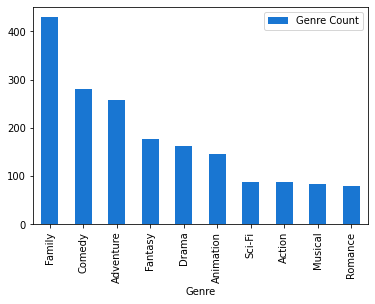

In [31]:
#DISNEY VIDEO GENRES: Bar Graph
top_disney_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='#1976d2')

In [32]:
# Dataframes of each service

netflix = combined_df.loc[combined_df["Netflix"] == 1]

hulu = combined_df.loc[combined_df["Hulu"] == 1]
hulu
primevideo = combined_df.loc[combined_df["Prime Video"] == 1]
primevideo
disney = combined_df.loc[combined_df["Disney+"] == 1]
disney.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
95,Saving Mr. Banks,2013,13+,7.5,79%,1,0,0,1,0,John Lee Hancock,"Biography,Comedy,Drama","United States,United Kingdom,Australia",English,125.0,1.0,0.0,0.0
103,Amy,2015,18+,7.8,95%,1,0,1,1,0,NaN,Drama,United States,English,60.0,1.0,1.0,0.0
122,Bolt,2008,7+,6.8,89%,1,0,0,1,0,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96.0,1.0,0.0,0.0
125,The Princess and the Frog,2009,all,7.1,85%,1,0,0,1,0,"Ron Clements,John Musker","Animation,Adventure,Comedy,Family,Fantasy,Musi...",United States,"English,French",97.0,3.0,0.0,0.0
150,Miracle,2004,7+,7.5,81%,1,0,0,1,0,Gavin O'Connor,"Biography,Drama,History,Sport","Canada,United States",English,135.0,0.0,0.0,0.0


In [33]:
# Oscar Nominated movies dataframe
netflix_nominations = netflix.loc[netflix["Nomination"] > 0]
hulu_nominations = hulu.loc[hulu["Nomination"] > 0]
primevideo_nominations = primevideo.loc[primevideo["Nomination"] > 0]
disney_nominations = disney.loc[disney["Nomination"] > 0]

In [34]:
# Netflix's top IMDb rated movies nominated for an Oscar

netflix_topimdb_nom = netflix_nominations.sort_values(by=["IMDb"], ascending=False)
netflix_topimdb_nom.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0


In [35]:
# Hulu's top IMDb rated movies nominated for an Oscar

hulu_topimdb_nom = hulu_nominations.sort_values(by=["IMDb"], ascending=False)
hulu_topimdb_nom

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
3560,The Dark Knight,2008,13+,9.0,94%,0,1,0,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller","United States,United Kingdom","English,Mandarin",152.0,8.0,2.0,0.0
3562,Parasite,2019,18+,8.6,99%,0,1,1,0,0,Bong Joon Ho,"Comedy,Drama,Thriller",South Korea,"Korean,English",132.0,6.0,4.0,2.0
3564,The Green Mile,1999,18+,8.6,78%,0,1,0,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0,4.0,0.0,1.0
3563,Good Will Hunting,1997,18+,8.3,97%,0,1,0,0,0,Gus Van Sant,"Drama,Romance",United States,English,126.0,9.0,2.0,1.0
3580,Free Solo,2018,13+,8.2,97%,0,1,0,1,0,"Jimmy Chin,Elizabeth Chai Vasarhelyi","Documentary,Adventure,Sport",United States,English,100.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,Nobody's Fool,2018,18+,4.8,24%,0,1,1,0,0,Tyler Perry,"Comedy,Drama,Romance",United States,English,110.0,2.0,0.0,0.0
4260,Feral,2018,NaN,4.6,33%,0,1,1,0,0,Mark Young,"Action,Drama,Horror,Thriller",United States,English,90.0,1.0,0.0,0.0
4313,Inside Out,2011,13+,4.5,25%,0,1,1,1,0,"Pete Docter,Ronnie Del Carmen","Animation,Adventure,Comedy,Drama,Family,Fantasy",United States,English,95.0,2.0,1.0,0.0
4376,No Way Out,2015,NaN,4.5,NaN,0,1,1,0,0,Roger Donaldson,"Action,Crime,Drama,Mystery,Romance,Thriller",United States,"English,Russian",114.0,1.0,0.0,0.0


In [36]:
# Prime Video's top IMDb rated movies nominated for an Oscar

primevideo_topimdb_nom = primevideo_nominations.sort_values(by=["IMDb"], ascending=False)
primevideo_nominations.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
31,Drive,2011,18+,7.8,92%,1,0,1,0,0,Nicolas Winding Refn,"Crime,Drama",United States,"English,Spanish",100.0,1.0,0.0,0.0
55,What's Eating Gilbert Grape,1993,13+,7.8,90%,1,0,1,0,0,Lasse Hallström,Drama,United States,English,118.0,1.0,0.0,0.0
103,Amy,2015,18+,7.8,95%,1,0,1,1,0,NaN,Drama,United States,English,60.0,1.0,1.0,0.0
130,The Squid and the Whale,2005,18+,7.3,92%,1,0,1,0,0,Noah Baumbach,"Comedy,Drama",United States,English,81.0,1.0,0.0,0.0


In [37]:
# Disney's top IMDb rated movies nominated for an Oscar

disney_topimdb_nom = disney_nominations.sort_values(by=["IMDb"], ascending=False)
disney_topimdb_nom.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
16214,The Lion King,1994,all,8.5,93%,0,0,0,1,0,Jon Favreau,"Animation,Adventure,Drama,Family,Musical","United States,United Kingdom","English,Xhosa,Zulu,French,Spanish",118.0,5.0,2.0,0.0
16216,Avengers: Endgame,2019,13+,8.4,93%,0,0,0,1,0,"Anthony Russo,Joe Russo","Action,Adventure,Drama,Sci-Fi",United States,"English,Japanese,Xhosa,German",181.0,1.0,0.0,0.0
16221,Coco,2017,7+,8.4,97%,0,0,0,1,0,"Lee Unkrich,Adrian Molina","Animation,Adventure,Family,Fantasy,Music,Mystery",United States,"English,Spanish",105.0,2.0,2.0,0.0
16215,Toy Story,1995,all,8.3,100%,0,0,0,1,0,John Lasseter,"Animation,Adventure,Comedy,Family,Fantasy",United States,English,81.0,3.0,0.0,0.0
16222,Toy Story 3,2010,all,8.3,98%,0,0,0,1,0,Lee Unkrich,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Spanish",103.0,5.0,2.0,1.0


In [38]:
# Count of award nominated movies
netflix_nom_movies = netflix_nominations["Title"].count()
hulu_nom_movies = hulu_nominations["Title"].count()
primevideo_nom_movies = primevideo_nominations["Title"].count()
disney_nom_movies = disney_nominations["Title"].count()

In [39]:
# Oscar Winning movies dataframe
netflix_wins = netflix.loc[netflix["Wins"] > 0]
hulu_wins = hulu.loc[hulu["Wins"] > 0]
primevideo_wins = primevideo.loc[primevideo["Wins"] > 0]
disney_wins = disney.loc[disney["Wins"] > 0]

netflix_win_movies = netflix_wins["Title"].count()
hulu_win_movies = hulu_wins["Title"].count()
primevideo_win_movies = primevideo_wins["Title"].count()
disney_win_movies = disney_wins["Title"].count()


In [40]:
# Nominated Best Picture
netflix_bp_nom = netflix.loc[netflix["Won Best Picture"] == 1]
hulu_bp_nom = hulu.loc[hulu["Won Best Picture"] == 1]
primevideo_bp_nom = primevideo.loc[primevideo["Won Best Picture"] == 1]
disney_bp_nom = disney.loc[disney["Won Best Picture"] == 1]

netflix_bp_nom_movies = netflix_bp_nom["Title"].count()
hulu_bp_nom_movies = hulu_bp_nom["Title"].count()
primevideo_bp_nom_movies = primevideo_bp_nom["Title"].count()
disney_bp_nom_movies = disney_bp_nom["Title"].count()


In [41]:
# Won Best Picture
netflix_bp = netflix.loc[netflix["Won Best Picture"] == 2]
hulu_bp = hulu.loc[hulu["Won Best Picture"] == 2]
primevideo_bp = primevideo.loc[primevideo["Won Best Picture"] == 2]
disney_bp = disney.loc[disney["Won Best Picture"] == 2]


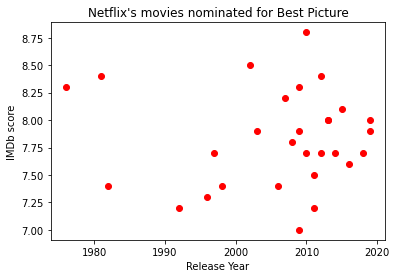

In [42]:
# Scatter plot Netflix's movies nominated for Best Picture

netflix_topimdb_bpnom = netflix_bp_nom.sort_values(by=["IMDb"], ascending=False)
netflix_topimdb_bpnom.head()

netflix_topimdb_bpnom["Year"].mean()
netflix_imdb = netflix_topimdb_bpnom["IMDb"]


plt.scatter(netflix_topimdb_bpnom["Year"], netflix_imdb, color="red")
plt.xlabel("Release Year")
plt.ylabel("IMDb score")
plt.title("Netflix's movies nominated for Best Picture")
plt.show()


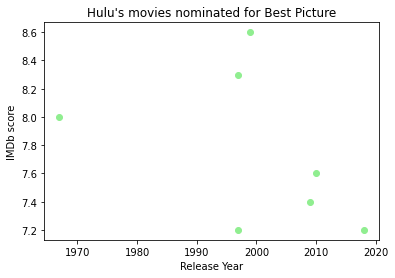

In [43]:
hulu_topimdb_bpnom = hulu_bp_nom.sort_values(by=["IMDb"], ascending=False)
hulu_topimdb_bpnom.head()

hulu_topimdb_bpnom["Year"].mean()

# 1996 average release year

hulu_topimdb_bpnom["Year"].mean()
hulu_imdb = hulu_topimdb_bpnom["IMDb"]



plt.scatter(hulu_topimdb_bpnom["Year"], hulu_imdb, color="lightgreen")
plt.xlabel("Release Year")
plt.ylabel("IMDb score")
plt.title("Hulu's movies nominated for Best Picture")
plt.show()

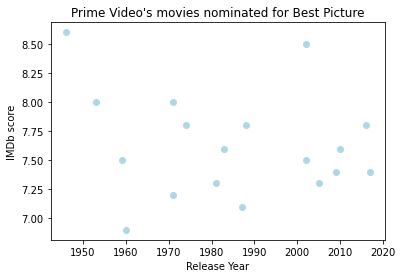

In [44]:
primevideo_topimdb_bpnom = primevideo_bp_nom.sort_values(by=["IMDb"], ascending=False)
primevideo_topimdb_bpnom.head()

primevideo_topimdb_bpnom["Year"].mean()

# 1977.6 average release year

primevideo_topimdb_bpnom["Year"].mean()
primevideo_imdb = primevideo_topimdb_bpnom["IMDb"]



plt.scatter(primevideo_topimdb_bpnom["Year"], primevideo_imdb, color="lightblue")
plt.xlabel("Release Year")
plt.ylabel("IMDb score")
plt.title("Prime Video's movies nominated for Best Picture")
plt.show()

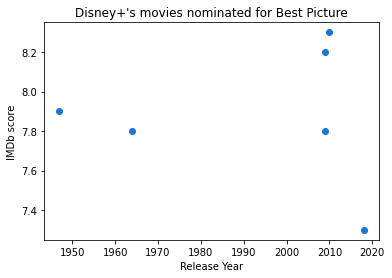

In [45]:
disney_topimdb_bpnom = disney_bp_nom.sort_values(by=["IMDb"], ascending=False)
disney_topimdb_bpnom.head()

disney_topimdb_bpnom["Year"].mean()

# 1987.8 average release year

disney_topimdb_bpnom["Year"].mean()
disney_imdb = disney_topimdb_bpnom["IMDb"]



plt.scatter(disney_topimdb_bpnom["Year"], disney_imdb, color="#1976d2")
plt.xlabel("Release Year")
plt.ylabel("IMDb score")
plt.title("Disney+'s movies nominated for Best Picture")
plt.show()

In [46]:
netflix_bp_win = netflix_bp["Title"].count()
hulu_bp_win = hulu_bp["Title"].count()
primevideo_bp_win = primevideo_bp["Title"].count()
disney_bp_win = disney_bp["Title"].count()

netflix_bp_win

3

In [47]:
# Count of movies that have been Nominated

# List of services to be index
ss_names = ["Netflix", "Hulu", "Prime Video", "Disney+"]

netflix_bp_win = netflix_bp["Title"].count()
hulu_bp_win = hulu_bp["Title"].count()
primevideo_bp_win = primevideo_bp["Title"].count()
disney_bp_win = disney_bp["Title"].count()

# Dataframe of wins, nominations
data = {
    'Nomination': [netflix_nom_movies, hulu_nom_movies, primevideo_nom_movies, disney_nom_movies],
    'Wins': [netflix_win_movies, hulu_win_movies, primevideo_win_movies, disney_win_movies],
    'Nominated Best Picture': [netflix_bp_nom_movies, hulu_bp_nom_movies, primevideo_bp_nom_movies, disney_bp_nom_movies],
    'Won Best Picture': [netflix_bp_win, hulu_bp_win, primevideo_bp_win, disney_bp_win],
}
ss_awards = pd.DataFrame(data, index =ss_names) 
ss_awards

,Nomination,Wins,Nominated Best Picture,Won Best Picture
Netflix,166,59,29,3
Hulu,66,19,7,1
Prime Video,377,102,18,3
Disney+,107,41,6,1


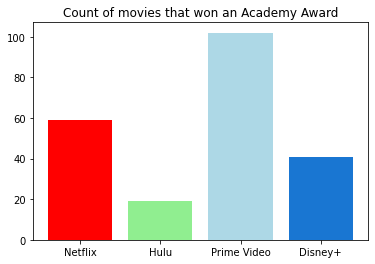

In [48]:
# Count of movies that won an Academy Award
win_plot = plt.bar(ss_names, ss_awards["Wins"], color=["red", "lightgreen", "lightblue", "#1976d2"])
plt.title("Count of movies that won an Academy Award")
plt.show()

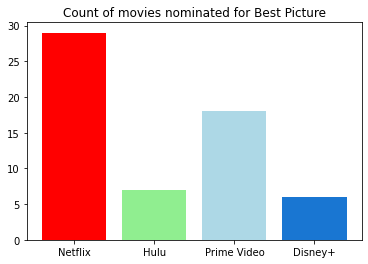

In [49]:
# Count of movies that were Nominated Best Picture
bpnom_plot = plt.bar(ss_names, ss_awards["Nominated Best Picture"], color=["red", "lightgreen", "lightblue", "#1976d2"])

plt.title("Count of movies nominated for Best Picture")
plt.show()

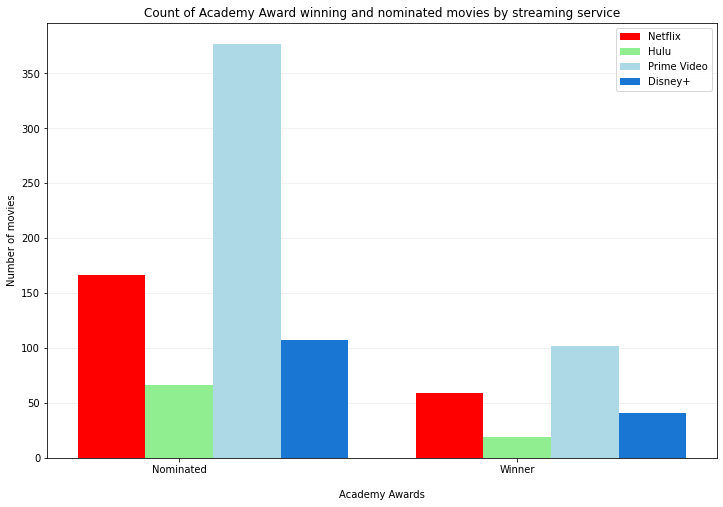

In [50]:
# Bars of award stats along x-axis
netflix_sum3 = ss_awards.iloc[0, 0:2]
hulu_sum3 = ss_awards.iloc[1, 0:2]
primevideo_sum3 = ss_awards.iloc[2, 0:2]
disney_sum3 = ss_awards.iloc[3, 0:2]

categories = ["Nomination", "Wins"]

x_axis3 = np.arange(len(categories))
bar_width = 0.2

fig, groupbars3 = plt.subplots(figsize=(12, 8))

b1 = groupbars3.bar(x_axis3, netflix_sum3, width=bar_width, label="Netflix", color="red")
b2 = groupbars3.bar(x_axis3+bar_width, hulu_sum3, width=bar_width, label="Hulu", color="lightgreen")
b3 = groupbars3.bar(x_axis3+bar_width*2, primevideo_sum3, width=bar_width, label="Prime Video", color="lightblue")
b4 = groupbars3.bar(x_axis3+bar_width*3, disney_sum3, width=bar_width, label="Disney+", color="#1976d2")

groupbars3.set_xticks(x_axis3 + bar_width)
groupbars3.set_xticklabels(["Nominated", "Winner"])
groupbars3.set_xlabel('Academy Awards', labelpad=15)
groupbars3.set_ylabel('Number of movies')
groupbars3.set_title('Count of Academy Award winning and nominated movies by streaming service')
groupbars3.set_axisbelow(True)
groupbars3.yaxis.grid(True, color='#EEEEEE')
groupbars3.legend()
plt.show()

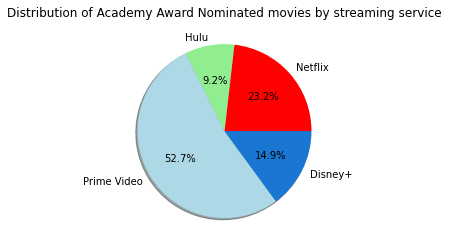

In [51]:
# All Academy Award Nominated movies by streaming service
plt.pie(ss_awards["Nomination"], labels=ss_names, colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Academy Award Nominated movies by streaming service")
plt.show()

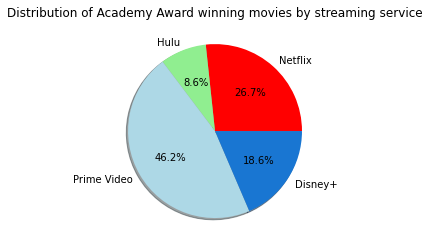

In [52]:
# All Academy Award Nominated movies by streaming service
plt.pie(ss_awards["Wins"], labels=ss_names, colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Academy Award winning movies by streaming service")
plt.show()

In [53]:
# List of service names
streaming_services = ["Netflix", "Hulu", "Prime Video", "Disney+"]


#Create a dataframe for each service
netflix_data = combined_df[combined_df['Netflix']==1]

prime_data = combined_df[combined_df['Prime Video']==1]

hulu_data = combined_df[combined_df['Hulu']==1]

disney_data = combined_df[combined_df['Disney+']==1]

In [54]:
#Create separate dataframes for streaming services with only US data in it

netflix_data_US = netflix_data[(netflix_data['Country'] == 'United States')]

prime_data_US = prime_data[(prime_data['Country'] == 'United States')]

hulu_data_US = hulu_data[(hulu_data['Country'] == 'United States')]

disney_data_US = disney_data[(disney_data['Country'] == 'United States')]

### Which streaming service has the highest number of movies?

Prime Video contains the highest number of movies compared to other three streaming services.

In [55]:
#Find the total no. of movies available in each streaming service

netflix_USmovies_count = netflix_data_US['Title'].count()

prime_USmovies_count = prime_data_US['Title'].count()

hulu_USmovies_count = hulu_data_US['Title'].count()

disney_USmovies_count = disney_data_US['Title'].count()

USmovies_count = pd.DataFrame({'Streaming Service': streaming_services,
                                'Total no. of movies (US)' :[netflix_USmovies_count, hulu_USmovies_count,
                                                       prime_USmovies_count, disney_USmovies_count]})
USmovies_count.sort_values('Total no. of movies (US)', ascending=False)


,Streaming Service,Total no. of movies (US)
2,Prime Video,6817
0,Netflix,1305
1,Hulu,502
3,Disney+,448


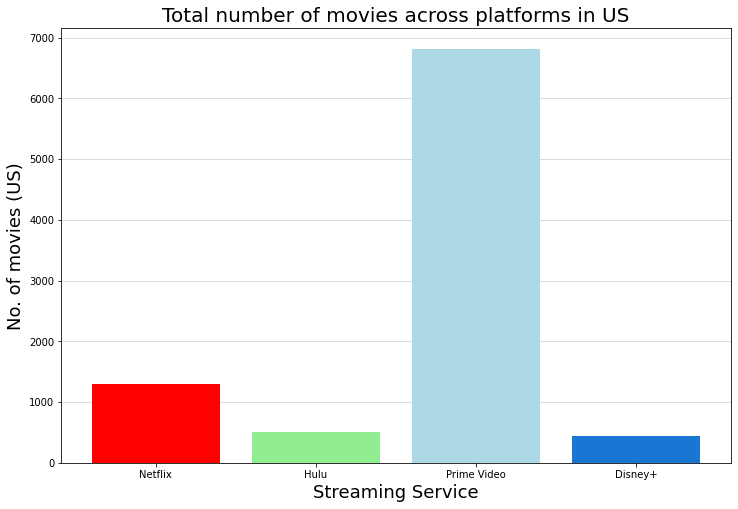

In [56]:
#Plot for total no. of movies on different platforms in US


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(USmovies_count['Streaming Service'], USmovies_count['Total no. of movies (US)'],
                                         color=["red", "lightgreen", "lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Total number of movies across platforms in US', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("No. of movies (US)", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/total_movies1.png")
plt.show()                  

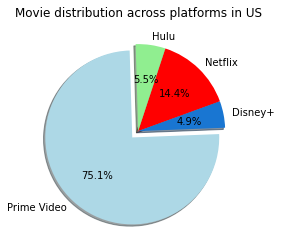

In [57]:
plt.pie(USmovies_count['Total no. of movies (US)'], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%",
           explode =(0,0,0.1,0), startangle = 20)

plt.title("Movie distribution across platforms in US")
plt.savefig("Images/total_movies2.png")
plt.show()

### How do the streaming services stand in terms of their Rotten Tomatoes (RT) ranking?

- Hulu with 44.62% of its movies having Rotten Tomatoes score greater than 60% tops the chart. Second follows Disney+ with 36.16%. Among all streaming services, although Prime Video has the highest number of movies with Rotten Tomatoes score greater than 60%, only 13% of its movies make up that number.
- All streaming services have almost similar average Rotten Tomatoes rating. Among them Hulu has the highest rating of 66.64%.

In [58]:
#Analysing mean RT score across platforms in US only

netflix_RT_drop = netflix_data_US['Rotten Tomatoes'].dropna()

netflix_RT_clean = netflix_RT_drop.reset_index()

netflix_RT_clean['Rotten Tomatoes'] = netflix_RT_clean['Rotten Tomatoes'].str.rstrip('%').astype('int')

netflix_RT_mean = netflix_RT_clean['Rotten Tomatoes'].mean()


hulu_RT_drop = hulu_data_US['Rotten Tomatoes'].dropna()

hulu_RT_clean = hulu_RT_drop.reset_index()

hulu_RT_clean['Rotten Tomatoes'] = hulu_RT_clean['Rotten Tomatoes'].str.rstrip('%').astype('int')

hulu_RT_mean = hulu_RT_clean['Rotten Tomatoes'].mean()


prime_RT_drop = prime_data_US['Rotten Tomatoes'].dropna()

prime_RT_clean = prime_RT_drop.reset_index()

prime_RT_clean['Rotten Tomatoes'] = prime_RT_clean['Rotten Tomatoes'].str.rstrip('%').astype('int')

prime_RT_mean = prime_RT_clean['Rotten Tomatoes'].mean()


disney_RT_drop = disney_data_US['Rotten Tomatoes'].dropna()

disney_RT_clean = disney_RT_drop.reset_index()

disney_RT_clean['Rotten Tomatoes'] = disney_RT_clean['Rotten Tomatoes'].str.rstrip('%').astype('int')

disney_RT_mean = disney_RT_clean['Rotten Tomatoes'].mean()


                                                            
                                                             

RT_scores_mean = pd.DataFrame({'Streaming Service': streaming_services,
                                'Mean RT score' :[netflix_RT_mean, hulu_RT_mean,
                                                  prime_RT_mean, disney_RT_mean]})
                                                                         
RT_scores_mean = RT_scores_mean.round(decimals=2)
RT_scores_mean

,Streaming Service,Mean RT score
0,Netflix,65.62
1,Hulu,66.64
2,Prime Video,62.55
3,Disney+,64.78


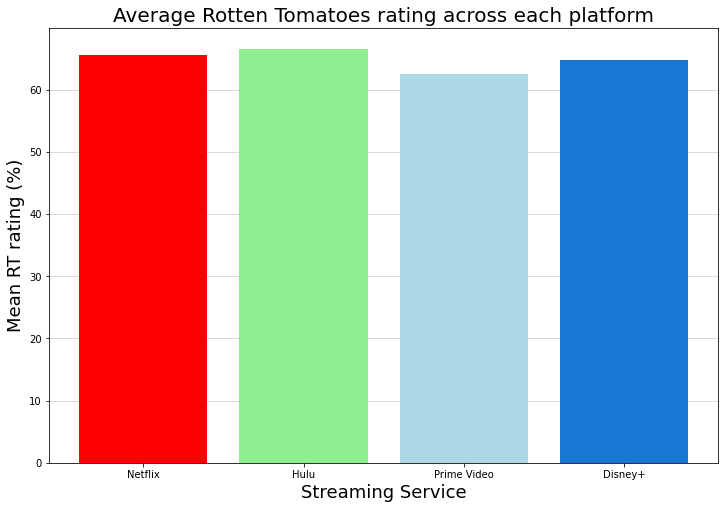

In [59]:
#Plot for mean RT score across each platform in US 


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(RT_scores_mean['Streaming Service'], RT_scores_mean['Mean RT score'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Average Rotten Tomatoes rating across each platform', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Mean RT rating (%)", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/Average_RT.png")
plt.show()

In [60]:
# Analyze the percentage of movies in each platform in US with RT > 60%

netflix_RT60 = netflix_RT_clean[netflix_RT_clean['Rotten Tomatoes']>60]

netflix_RT60_count = netflix_RT60['Rotten Tomatoes'].count()

netflix_RT60_percent = (netflix_RT60_count/netflix_USmovies_count)*100


hulu_RT60 = hulu_RT_clean[hulu_RT_clean['Rotten Tomatoes']>60]

hulu_RT60_count = hulu_RT60['Rotten Tomatoes'].count()

hulu_RT60_percent = (hulu_RT60_count/hulu_USmovies_count)*100


prime_RT60 = prime_RT_clean[prime_RT_clean['Rotten Tomatoes']>60]

prime_RT60_count = prime_RT60['Rotten Tomatoes'].count()

prime_RT60_percent = (prime_RT60_count/prime_USmovies_count)*100


disney_RT60 = disney_RT_clean[disney_RT_clean['Rotten Tomatoes']>60]

disney_RT60_count = disney_RT60['Rotten Tomatoes'].count()

disney_RT60_percent = (disney_RT60_count/disney_USmovies_count)*100




percent_RT60 = pd.DataFrame({'Streaming Service': streaming_services,
                                '% of movies with RT > 60' :[netflix_RT60_percent, hulu_RT60_percent,
                                                                     prime_RT60_percent, disney_RT60_percent]})
percent_RT60 = percent_RT60.round(decimals=2)
percent_RT60

,Streaming Service,% of movies with RT > 60
0,Netflix,32.80
1,Hulu,44.62
2,Prime Video,13.00
3,Disney+,36.16


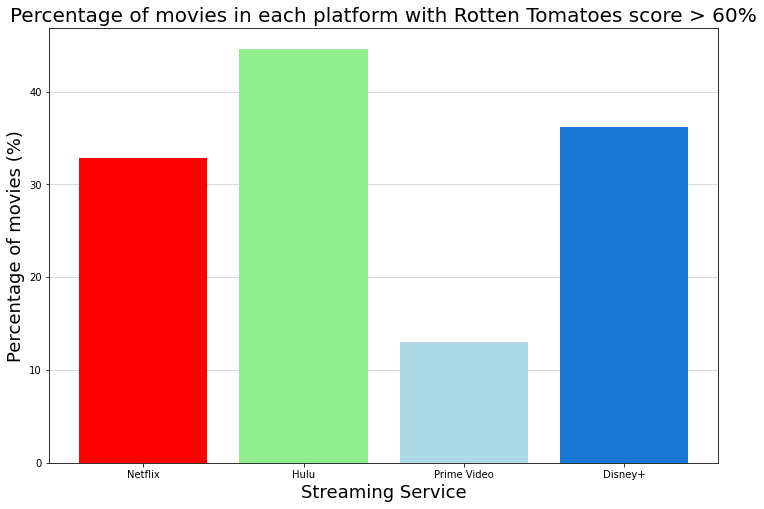

In [61]:
#Plot for percentage of movies in each platform in US with RT score > 60%


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(percent_RT60['Streaming Service'], percent_RT60['% of movies with RT > 60'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Percentage of movies in each platform with Rotten Tomatoes score > 60%', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Percentage of movies (%)", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/RT60_percent.png")
plt.show()



In [62]:
#Dataframe for number of movies in each platform in US with RT score > 60%

#Create a dataframe
count_RT60 = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with RT > 60' :[netflix_RT60_count, hulu_RT60_count,
                                                                     prime_RT60_count, disney_RT60_count]})


count_RT60



,Streaming Service,No. of movies with RT > 60
0,Netflix,428
1,Hulu,224
2,Prime Video,886
3,Disney+,162


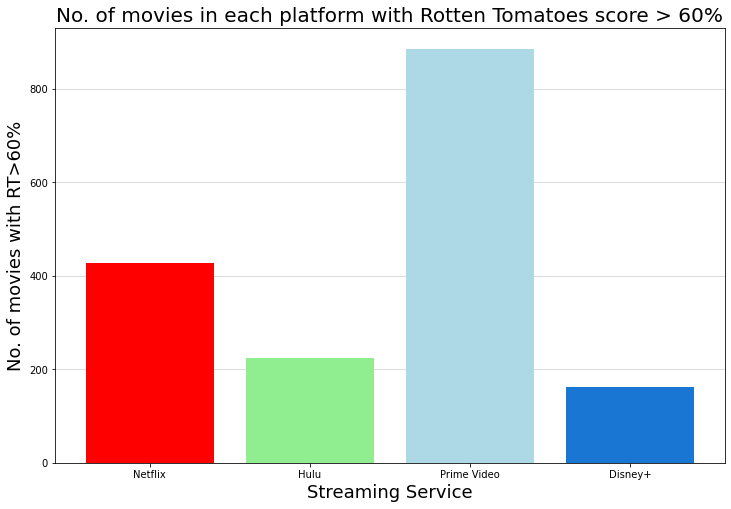

In [63]:
#Plot for number of movies in each platform in US with RT score > 60%
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(count_RT60['Streaming Service'], count_RT60['No. of movies with RT > 60'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('No. of movies in each platform with Rotten Tomatoes score > 60%', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("No. of movies with RT>60%", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/RT60_num.png")
plt.show()

### Which streaming service has the highest number of recently released movies?
Prime Video has the highest number of movies released in the year 2015, 2016, and 2017. On the other side, Netflix is overtaking Prime Video with number of movies released from 2018 until now.

In [64]:
#Netflix movies count in US for year 2015-2020 
netflix_new_US = netflix_data_US[netflix_data_US["Year"]>=2015].groupby(["Year"])['Netflix'].count()      
netflix_new_US

netflix_new_df_US = netflix_new_US.to_frame().reset_index()
#netflix_new_df.T
#netflix_new_df.plot.bar('Year', 'Netflix', color='b')

#Prime Video movies count in US for year 2015-2020
prime_new_US = prime_data_US[prime_data_US["Year"]>=2015].groupby(["Year"])['Prime Video'].count()      
prime_new_US

prime_new_df_US = prime_new_US.to_frame().reset_index()
prime_new_df_US.T

#Hulu movies count in US for year 2015-2020
hulu_new_US = hulu_data_US[hulu_data_US["Year"]>=2015].groupby(["Year"])['Hulu'].count()      
hulu_new_US

hulu_new_df_US = hulu_new_US.to_frame().reset_index()
hulu_new_df_US.T

#Disney movies count in US for year 2015-2020
disney_new_US = disney_data_US[disney_data_US["Year"]>=2015].groupby(["Year"])['Disney+'].count()      
disney_new_US

disney_new_df_US = disney_new_US.to_frame().reset_index()
disney_new_df_US

,Year,Disney+
0,2015,9
1,2016,15
2,2017,18
3,2018,13
4,2019,17
5,2020,9


In [65]:
#Merge the 4 dataframes
merge1_US = pd.merge(netflix_new_df_US, hulu_new_df_US,  on='Year' )
merge2_US = pd.merge(prime_new_df_US, disney_new_df_US,  on='Year')
year_merge_US = pd.merge(merge1_US, merge2_US, on='Year')
year_merge_US.set_index('Year')

,Netflix,Hulu,Prime Video,Disney+
Year,,,,
2015,93,34,410,9
2016,153,35,409,15
2017,219,59,390,18
2018,197,90,302,13
2019,181,65,100,17
2020,53,5,16,9


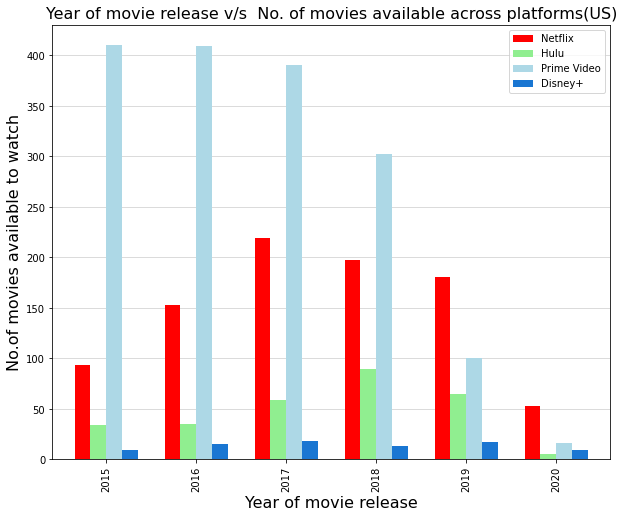

In [66]:
#Plot the year_release graph
year_merge_US.plot.bar('Year',  color=["red", "lightgreen", "lightblue", "#1976d2"], figsize=(10,8), width=0.7)
                   
plt.title('Year of movie release v/s  No. of movies available across platforms(US)', fontsize=16)

plt.ylabel('No.of movies available to watch', fontsize=16)
plt.xlabel('Year of movie release', fontsize=16)
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.savefig("Images/release_year.png")

### How do the streaming services rank in their content's IMDb score?
- Disney+ comes first with 30.13% of its movies having IMDb score of greater than 7 followed by Netflix at 25.06%. Though Prime Video has the highest number of movies with IMDb score greater than 7, this makes up only 15.53% of its content.
- Netflix, Hulu and Disney+ have an average IMDb score over 6 with Disney+ at the top with 6.44. Prime Video has IMDb score of only 5.6.


In [67]:
#Analysing IMDb score for movies in US only

#Create dataframes for each streaming service with IMDb > 7

netflix_imdb_US = netflix_data_US[netflix_data_US['IMDb'] > 7]
net_imdb_count = netflix_imdb_US['IMDb'].count()

hulu_imdb_US =hulu_data_US[hulu_data_US['IMDb']> 7]
hulu_imdb_count = hulu_imdb_US['IMDb'].count()


prime_imdb_US = prime_data_US[prime_data_US['IMDb']> 7] 
prime_imdb_count = prime_imdb_US['IMDb'].count()


disney_imdb_US = disney_data_US[disney_data_US['IMDb']> 7]  
disney_imdb_count = disney_imdb_US['IMDb'].count()
                                                            
                                                             

imdb_scores_US = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with IMDb > 7' :[net_imdb_count, hulu_imdb_count,
                                                                     prime_imdb_count, disney_imdb_count]})
                                                                         
imdb_scores_US 


,Streaming Service,No. of movies with IMDb > 7
0,Netflix,327
1,Hulu,106
2,Prime Video,1059
3,Disney+,135


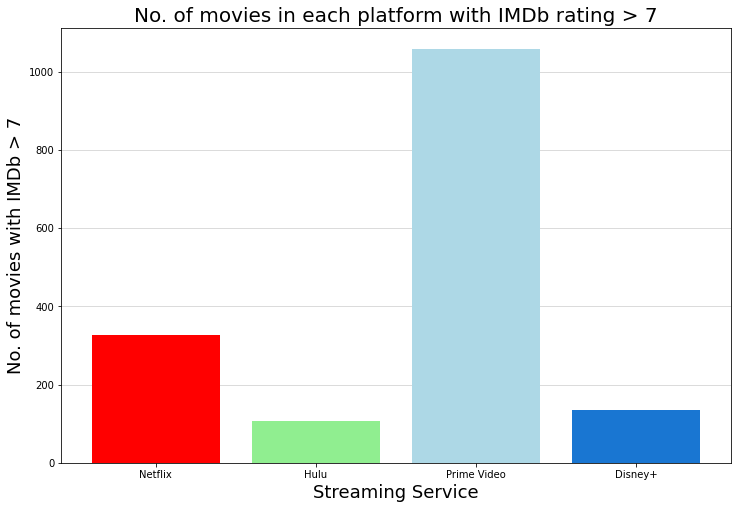

In [68]:
#Analysing movies with IMDb > 7 in US only

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(imdb_scores_US['Streaming Service'], imdb_scores_US['No. of movies with IMDb > 7'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('No. of movies in each platform with IMDb rating > 7', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("No. of movies with IMDb > 7", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/imdb_num.png")
plt.show()

In [69]:
#Analysing percentage of movies in US in each platform with IMDb > 7 

netflix_percent_imdb = (net_imdb_count/netflix_USmovies_count)*100
netflix_percent_imdb

prime_percent_imdb = (prime_imdb_count/prime_USmovies_count)*100

hulu_percent_imdb = (hulu_imdb_count/hulu_USmovies_count)*100

disney_percent_imdb = (disney_imdb_count/disney_USmovies_count)*100

percent_imdb = pd.DataFrame({'Streaming Service': streaming_services,
                                '% of movies with IMDb > 7' :[netflix_percent_imdb, hulu_percent_imdb,
                                                                     prime_percent_imdb, disney_percent_imdb]})
percent_imdb = percent_imdb.round(decimals=2)
percent_imdb

,Streaming Service,% of movies with IMDb > 7
0,Netflix,25.06
1,Hulu,21.12
2,Prime Video,15.53
3,Disney+,30.13


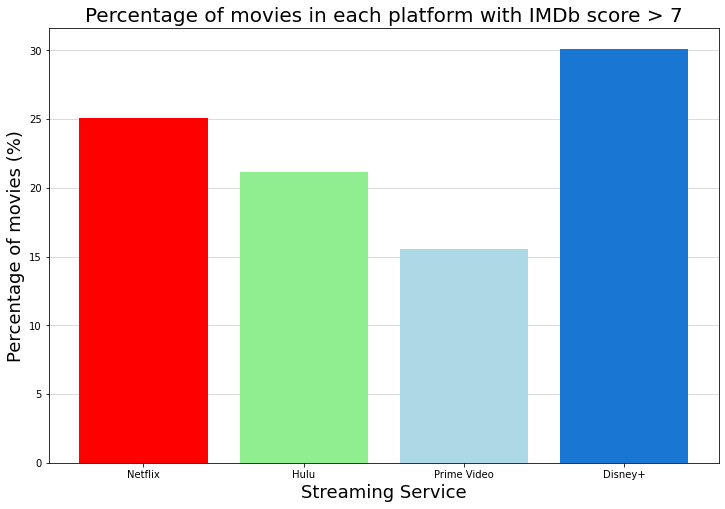

In [70]:
#Plot for percentage of movies in each platform in US with IMDb score > 7


#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(percent_imdb['Streaming Service'], percent_imdb['% of movies with IMDb > 7'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Percentage of movies in each platform with IMDb score > 7', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Percentage of movies (%)", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/imdb_percent.png")
plt.show()

In [71]:
#Analysing mean IMDb score across platforms in US only
netflix_imdb_mean = netflix_data_US['IMDb'].mean()

hulu_imdb_mean =hulu_data_US['IMDb'].mean()



prime_imdb_mean = prime_data_US['IMDb'].mean() 



disney_imdb_mean = disney_data_US['IMDb'].mean() 

                                                            
                                                             

imdb_scores_mean = pd.DataFrame({'Streaming Service': streaming_services,
                                'Mean IMDb' :[netflix_imdb_mean, hulu_imdb_mean,
                                                                     prime_imdb_mean, disney_imdb_mean]})
                                                                         
imdb_scores_mean
#netflix_imdb_mean

,Streaming Service,Mean IMDb
0,Netflix,6.246517
1,Hulu,6.091383
2,Prime Video,5.591975
3,Disney+,6.442729


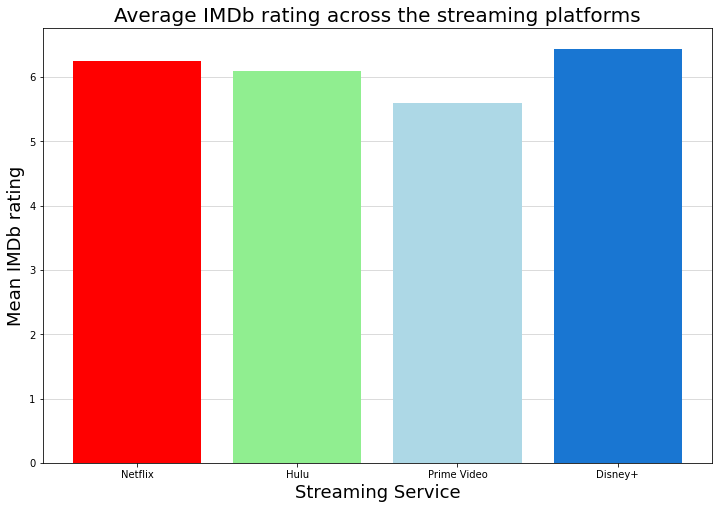

In [72]:
#Analysing mean IMDb score across platforms in US only

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')
plt.bar(imdb_scores_mean['Streaming Service'], imdb_scores_mean['Mean IMDb'],
                                         color=["red", "lightgreen","lightblue", "#1976d2"],
                                        alpha = 1, align="center")

# Set a Title and labels
plt.title('Average IMDb rating across the streaming platforms', fontsize=20)
plt.xlabel("Streaming Service", fontsize=18)
plt.ylabel("Mean IMDb rating", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/avg_imdb.png")
plt.show()

### Which are the top languages in each streaming service?
- English is the top most language in all streaming services.
- Excluding English, Spanish, French, German, Mandarin, Japanese, and Italian are the next top languages across all streaming services.
- Though the number of movies in majority of the languages is highest is Prime Video, Netflix has more movies in Turkish and Filipino than Prime Video.
- Hindi is the second top language in Netflix and third in Prime Video, but it is not in the top 10 languages of Hulu and Disney+.
- It is interesting to note that Italian is among the top 5 languages in Prime Video, Disney+ and Hulu, but in Netflix it is at 8th position.

In [73]:
#Split and Create new dataframe for movie languages in Netflix
netflix_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Netflix']==1)]


#Split languages names and count no. of movies in each languages
netflix_lang_count = {}
for x in netflix_lang["Language"].values:

    netflix_lang_list = x.split(",")
    #print (netflix_lang_list)
    for y in netflix_lang_list:
        y = y.strip()
        #print(y)
        if y not in netflix_lang_count:
            netflix_lang_count[y]=0
        netflix_lang_count[y] +=1
        #print(netflix_lang_count)
    
#netflix_lang_count

netflixlang_name = netflix_lang_count.keys() 
count_netflixlang = netflix_lang_count.values() 



all_netflix_lang_df=pd.DataFrame(count_netflixlang, netflixlang_name)
#all_netflix_lang_df.head(21)

netflix_lang_sort=all_netflix_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
netflix_lang_sort= netflix_lang_sort.sort_values('Counts',ascending = False)

netflix_lang_sort.head()

,Language,Counts
0,English,2264
10,Hindi,377
4,Spanish,332
2,French,212
5,German,106


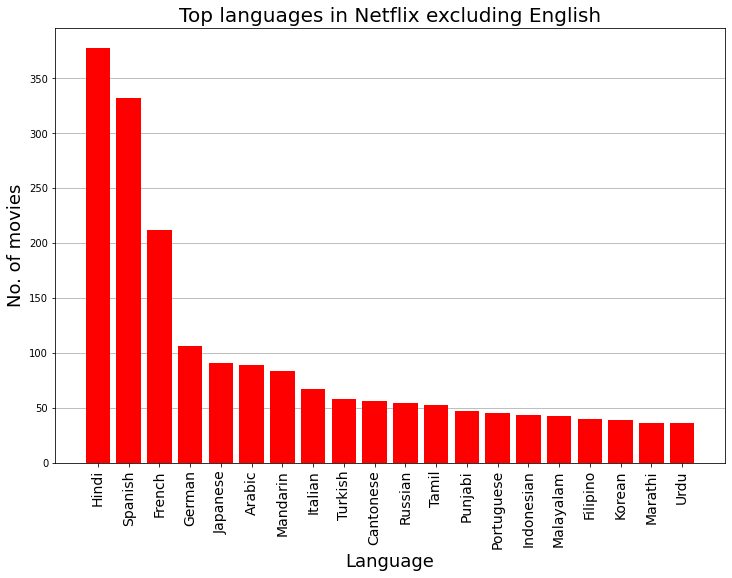

In [74]:
#Select the top 20 languages excluding English by value counts


netflix_lang_top = netflix_lang_sort[1:21]



#Specify x & y values
xvalues = netflix_lang_top['Language'].values
yvalues= netflix_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='red', alpha = 1, align="center")
plt.xticks(netflix_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in Netflix excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("No. of movies", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/netflix_lang.png")
plt.show()

In [75]:
#Split and Create new dataframe for movie languages in Prime Video
prime_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Prime Video']==1)]


#Split languages names and count no. of movies in each languages
prime_lang_count = {}
for x in prime_lang["Language"].values:

    prime_lang_list = x.split(",")
    
    for y in prime_lang_list:
        y = y.strip()
        
        if y not in prime_lang_count:
            prime_lang_count[y]=0
        prime_lang_count[y] +=1
        
    


primelang_name = prime_lang_count.keys() 
count_primelang = prime_lang_count.values() 



all_prime_lang_df=pd.DataFrame(count_primelang, primelang_name)
#all_prime_lang_df.head(21)


prime_lang_sort=all_prime_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
prime_lang_sort= prime_lang_sort.sort_values('Counts',ascending = False)

prime_lang_sort.head()

,Language,Counts
1,English,10088
13,French,522
5,Spanish,493
4,Hindi,424
0,Italian,352


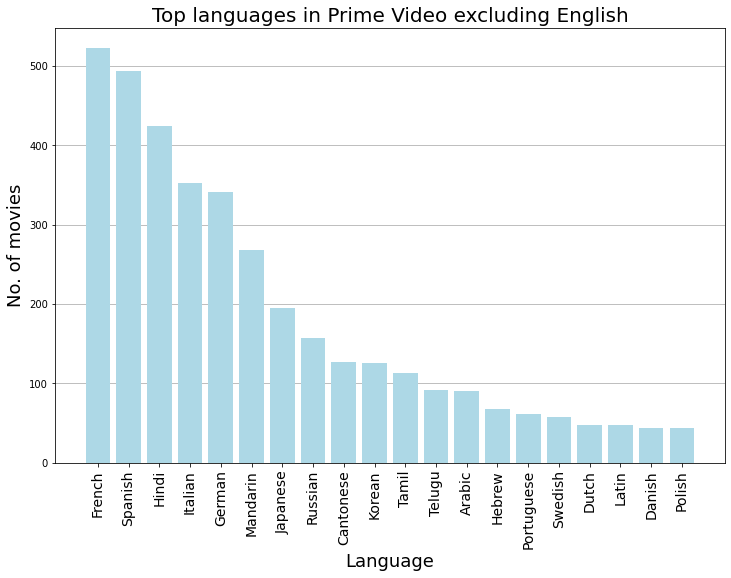

In [76]:
#Select the top 20 languages excluding English by value counts
prime_lang_top = prime_lang_sort[1:21]


#Specify x & y values
xvalues = prime_lang_top['Language'].values
yvalues= prime_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='lightblue', alpha = 1, align="center")
plt.xticks(prime_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in Prime Video excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("No. of movies", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/prime_lang.png")
plt.show()

In [77]:
#Split and Create new dataframe for movie languages in Hulu
hulu_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Hulu']==1)]


#Split languages names and count no. of movies in each languages
hulu_lang_count = {}
for x in hulu_lang["Language"].values:

    hulu_lang_list = x.split(",")
    
    for y in hulu_lang_list:
        y = y.strip()
        
        if y not in hulu_lang_count:
            hulu_lang_count[y]=0
        hulu_lang_count[y] +=1
        
    


hululang_name = hulu_lang_count.keys() 
count_hululang = hulu_lang_count.values() 



all_hulu_lang_df=pd.DataFrame(count_hululang, hululang_name)
#all_hulu_lang_df.head(21)


hulu_lang_sort=all_hulu_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
hulu_lang_sort= hulu_lang_sort.sort_values('Counts',ascending = False)

hulu_lang_sort.head()

,Language,Counts
0,English,815
3,French,73
1,Spanish,66
14,German,41
2,Japanese,35


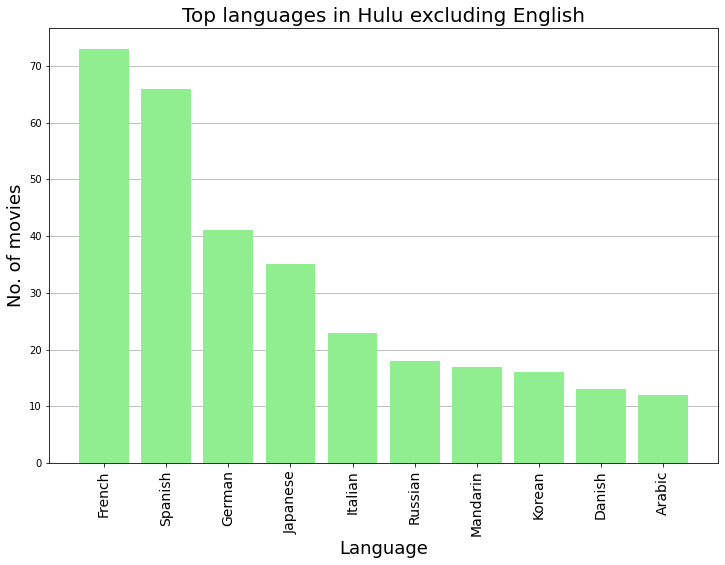

In [78]:
#Select the top 10 languages excluding English by value counts
hulu_lang_top = hulu_lang_sort[1:11]


#Specify x & y values
xvalues = hulu_lang_top['Language'].values
yvalues= hulu_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='lightgreen', alpha = 1, align="center")
plt.xticks(hulu_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in Hulu excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("No. of movies", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/hulu_lang.png")
plt.show()

In [79]:
#Split and Create new dataframe for movie languages in Disney
disney_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Disney+']==1)]


#Split languages name and count no. of movies in each language
disney_lang_count = {}
for x in disney_lang["Language"].values:

    disney_lang_list = x.split(",")
    
    for y in disney_lang_list:
        y = y.strip()
        
        if y not in disney_lang_count:
            disney_lang_count[y]=0
        disney_lang_count[y] +=1
        
    


disneylang_name = disney_lang_count.keys() 
count_disneylang = disney_lang_count.values() 



all_disney_lang_df=pd.DataFrame(count_disneylang, disneylang_name)
#all_disney_lang_df.head(21)


disney_lang_sort=all_disney_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
disney_lang_sort= disney_lang_sort.sort_values('Counts',ascending = False)

disney_lang_sort.head()

,Language,Counts
0,English,557
1,French,30
14,Spanish,20
8,German,17
22,Italian,11


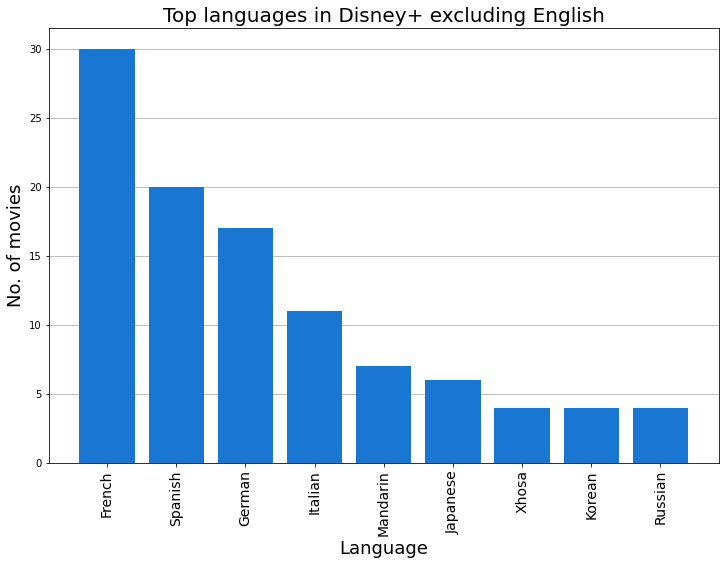

In [80]:
#Select the top 10 languages excluding English by value counts
disney_lang_top = disney_lang_sort[1:10]


#Specify x & y values
xvalues = disney_lang_top['Language'].values
yvalues= disney_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='#1976d2', alpha = 1, align="center")
plt.xticks(disney_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in Disney+ excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("No. of movies", fontsize=18)
#plt.legend()

# Save the figure & show fig
plt.savefig("Images/disney_lang.png")
plt.show()